In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [34]:
def signum(midpoint, matrix): #signum algse difusiooni testimiseks
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if j < midpoint:
                c1[i][j] = 1
            else:
                c1[i][j] = -1

def diffuse(amount, matrix, in_x_direction):
    #if want to use constant weights, these below should be used. In for loops, all w1, w2 should be commented out then
    #w1 = amount
    #w2 = 1-w1
    
    for i in range(N): #diffuses from left to right i think
        for j in range(N):
            
            if in_x_direction: #if transformation was made horizontally
                w1 = a*np.cos(j*np.pi*2/N) - math.floor(a*np.cos(j*np.pi*2/N)) #let us do only cos
                #print(' eqv w1 = ',w1)
                w2 = 1-w1
                matrix[i][j] = w1*matrix[i][j-1] + w2*matrix[i][j]
            else: #else => transformation was made vertically
                w1 = a*np.cos(i*np.pi*2/N) - math.floor(a*np.cos(i*np.pi*2/N))
                w2 = 1-w1
                matrix[i][j] = w1*matrix[i-1][j] + w2*matrix[i][j]
            
    if in_x_direction:
        matrix = matrix.T[::-1].T #reverses array
        print(matrix)
    else:
        matrix = matrix[::-1]

    for i in range(N): #diffuses from right to left (?)
        for j in range(N):

            if in_x_direction:
                w1 = a*np.cos(j*np.pi*2/N) - math.floor(a*np.cos(j*np.pi*2/N)) #let us do only cos
                #print(' eqv w1 v2= ',w1)
                w2 = 1-w1
                matrix[i][j] = w1*matrix[i][j-1] + w2*matrix[i][j]
            else:
                w1 = a*np.cos(i*np.pi*2/N) - math.floor(a*np.cos(i*np.pi*2/N))
                w2 = 1-w1
                matrix[i][j] = w1*matrix[i-1][j] + w2*matrix[i][j]

    fig = plt.figure(figsize=(8,8))
    colbar = plt.imshow(matrix, cmap='viridis', interpolation='none', extent=[0, N, 0, N], origin='lower', aspect='auto')
    plt.clim(-1, 1) #fixes limits of color bar
    #cmap variante: Greys, hot, terrain, rainbow, cividis, viridis. viimane loengu näitele kõige sarnasem
    fig.colorbar(colbar)

    plt.show()

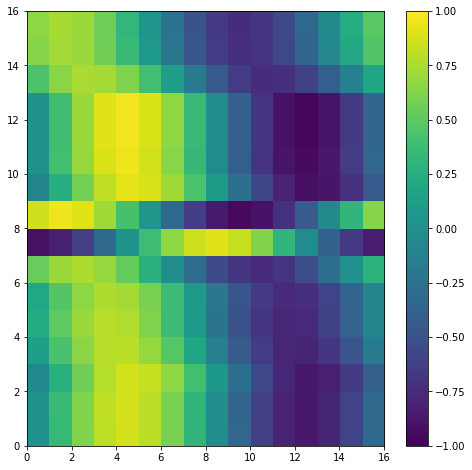

[[ 0.66095107  0.73571979  0.69848184  0.55490637  0.32685143  0.04903632
  -0.23624412 -0.48555854 -0.66095107 -0.73571979 -0.69848184 -0.55490637
  -0.32685143 -0.04903632  0.23624412  0.48555854]
 [ 0.63921994  0.72365981  0.69792903  0.56594489  0.34780077  0.07670713
  -0.20606447 -0.45746462 -0.63921994 -0.72365981 -0.69792903 -0.56594489
  -0.34780077 -0.07670713  0.20606447  0.45746462]
 [ 0.44157731  0.64135823  0.74349817  0.73244725  0.60988788  0.39447861
   0.11901355 -0.17457025 -0.44157731 -0.64135823 -0.74349817 -0.73244725
  -0.60988788 -0.39447861 -0.11901355  0.17457025]
 [ 0.0204747   0.38833794  0.69708025  0.8996984   0.96534564  0.88402774
   0.66812464  0.35050562 -0.0204747  -0.38833794 -0.69708025 -0.8996984
  -0.96534564 -0.88402774 -0.66812464 -0.35050562]
 [ 0.0204747   0.38833794  0.69708025  0.8996984   0.96534564  0.88402774
   0.66812464  0.35050562 -0.0204747  -0.38833794 -0.69708025 -0.8996984
  -0.96534564 -0.88402774 -0.66812464 -0.35050562]
 [ 0.03

In [35]:
N = 128 #pildi lahutus
a = 500 #transformatsiooni tugevus
amount = 0.7 #diffusion amount if constant weights are used, 0 = none, 1 = too much
c1 = np.zeros((N,N))
#signum(256, c1)
#three lines below are for initial sine
for i in range(N): #sama kood, mis loengus oli: algne siinus
        for j in range(N):
            c1[i][j] = np.sin(j*np.pi*2/N) #siinus i-teljel   
#diffuse(amount, c1, True)

c2 = np.zeros((N,N)) #tegin kõik transformatsioonid eraldi: ei leidnud esialgu mõtet eraldi fuktsiooni kirjutama hakata
for i in range(N): #esimene transformatsioon koosinusega, j-teljel
    for j in range(N):
        c2[i][j] = c1[i][(j+int(a*np.cos(i*np.pi*2/N))) & N-1] #(math.floor teeb täpselt sama asja mis int, kui pos arvud)
diffuse(amount, c2, False)
print(c2)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-0.30182753 -0.29595553 -0.70110672 -0.52870773 -0.52870773 -0.50937786
  -0.3726347  -0.12763286  0.35585406  0.43930024  0.24137307  0.32685143
   0.64102676  0.33130884  0.035430

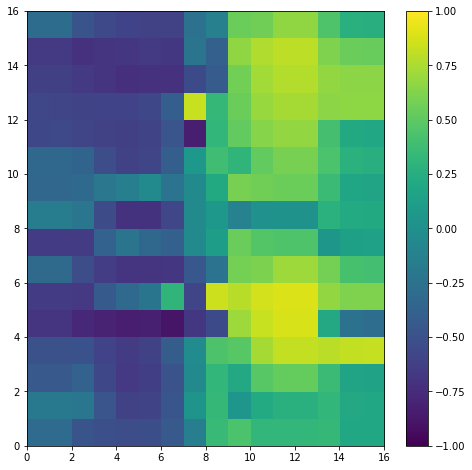

In [36]:
c3 = np.zeros((N,N))
print(c3)
for i in range(N):
    for j in range(N):
        c3[i][j] = c2[(i+int(a*np.cos(j*np.pi*2/N))) & N-1][j]
diffuse(amount, c3, True)


[[ 0.16309259  0.15256818  0.00942405 -0.35463534 -0.35463534 -0.38204795
  -0.48188678 -0.51204767 -0.5208966  -0.39902745 -0.24652615 -0.14641106
   0.36242393  0.37508017  0.3273083   0.32729445]
 [-0.45999489 -0.45899993 -0.33646204  0.15053633  0.15053633  0.21024006
   0.06023064  0.2235219   0.26545593  0.25712339  0.24613684  0.20377201
   0.0572718  -0.20491138 -0.21356987 -0.21484203]
 [-0.44016256 -0.47825524 -0.50524206 -0.62069106 -0.62069106 -0.64804863
  -0.62070524 -0.48518542 -0.02228504  0.35371829  0.38836886  0.48212919
   0.46066945  0.33522782  0.18143905  0.16996151]
 [-0.50708703 -0.50716724 -0.51670515 -0.35964984 -0.35964984 -0.23091876
  -0.00970683  0.43823902  0.49911024  0.7693137   0.81306013  0.81306013
   0.56716857  0.13214439 -0.42229911 -0.50202294]
 [-0.74965554 -0.7531658  -0.79660766 -0.84035536 -0.84035536 -0.84463646
  -0.87225719 -0.67444252 -0.46898057  0.77431242  0.86026001  0.87609226
   0.55481648 -0.06409084 -0.28369132 -0.28609001]
 [-0.

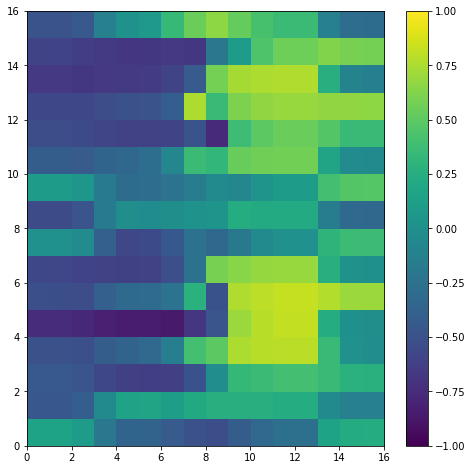

In [37]:
c4 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        c4[i][j] = c3[i][(j+int(a*np.cos(i*np.pi*2/N))) & N-1]
diffuse(amount, c4, True)

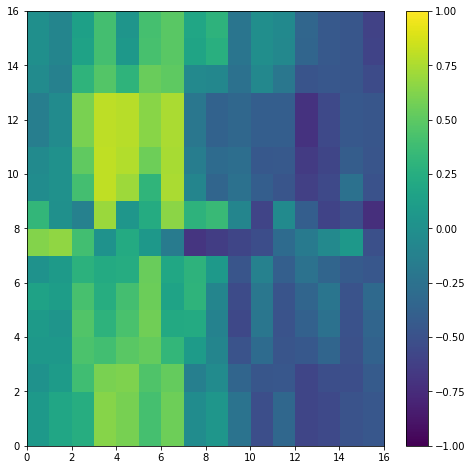

In [38]:
c5 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        c5[i][j] = c4[(i+int(a*np.cos(j*np.pi*2/N))) & N-1][j]
diffuse(amount, c5, False)

[[-3.82176855e-02 -6.63828075e-02 -2.32707375e-01 -5.02545034e-01
  -5.02545034e-01 -4.49812922e-01 -4.32158284e-01 -3.41440416e-01
  -4.78347233e-02  4.69446455e-02  1.17118132e-01  2.92425656e-01
   2.09750044e-01  2.56122674e-01  6.77228515e-02  4.60002214e-02]
 [-2.57137278e-03  1.97239776e-02  8.97246635e-02  2.92115813e-01
   2.92115813e-01  3.07331871e-01  4.82964861e-01  4.16597538e-01
   7.48347597e-02  2.19402651e-01 -8.58388433e-03 -9.20269239e-02
  -1.78965806e-01 -5.10971348e-01 -4.39256427e-01 -4.37649645e-01]
 [-4.38401307e-01 -4.64184958e-01 -3.98076031e-01 -2.61990388e-01
  -2.61990388e-01 -1.49518341e-01 -8.06538610e-02 -2.54488250e-01
  -5.96006737e-02  2.05307171e-01  5.29731889e-01  5.44604974e-01
   2.53147350e-01  1.55709935e-01 -9.23671157e-02 -1.17446496e-01]
 [-5.68353392e-01 -5.76183418e-01 -5.90511294e-01 -3.66669050e-01
  -3.66669050e-01 -3.46408397e-01 -3.59431716e-01 -2.08227518e-01
   7.41668890e-01  7.11154083e-01  7.96526024e-01  8.01825567e-01
   3.03

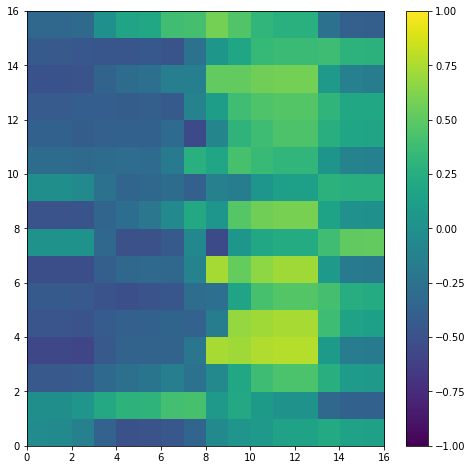

In [39]:
c6 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        c6[i][j] = c5[i][(j+int(a*np.cos(i*np.pi*2/N))) & N-1]
diffuse(amount, c6, True)

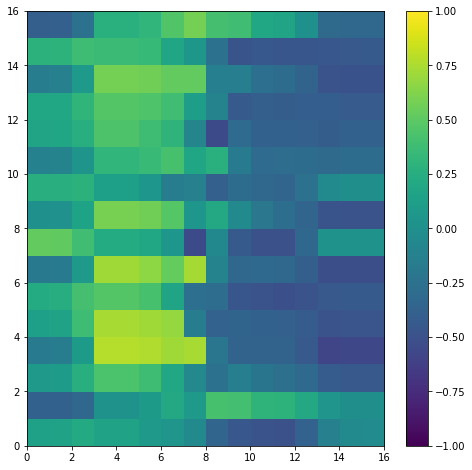

In [40]:
fig = plt.figure(figsize=(8,8))
colbar = plt.imshow(c6, cmap='viridis', interpolation='none', extent=[0, N, 0, N], origin='lower', aspect='auto')
plt.clim(-1, 1) #fixes limits of color bar
#cmap variante: Greys, hot, terrain, rainbow, cividis, viridis. viimane loengu näitele kõige sarnasem
fig.colorbar(colbar)

plt.show()

In [41]:
"""original code
N = 128 #pildi lahutus
a = 512.0 #transformatsiooni tugevus
c1 = np.zeros((N,N))

for i in range(N): #sama kood, mis loengus oli: algne siinus
    for j in range(N):
        c1[i][j] = np.sin(i*np.pi*2/N) #siinus i-teljel
        
c2 = np.zeros((N,N)) #tegin kõik transformatsioonid eraldi: ei leidnud esialgu mõtet eraldi fuktsiooni kirjutama hakata
for i in range(N): #esimene transformatsioon koosinusega, i-teljel
    for j in range(N):
        c2[i][j] = c1[(i+int(a*np.cos(j*np.pi*2/N))) & N-1][j]"""

'original code\nN = 128 #pildi lahutus\na = 512.0 #transformatsiooni tugevus\nc1 = np.zeros((N,N))\n\nfor i in range(N): #sama kood, mis loengus oli: algne siinus\n    for j in range(N):\n        c1[i][j] = np.sin(i*np.pi*2/N) #siinus i-teljel\n        \nc2 = np.zeros((N,N)) #tegin kõik transformatsioonid eraldi: ei leidnud esialgu mõtet eraldi fuktsiooni kirjutama hakata\nfor i in range(N): #esimene transformatsioon koosinusega, i-teljel\n    for j in range(N):\n        c2[i][j] = c1[(i+int(a*np.cos(j*np.pi*2/N))) & N-1][j]'

In [42]:
a=100
print("transformation, floored value, difference = weight")
for j in range(16):
    print(a*np.cos(j*np.pi*2/N),", ",math.floor(a*np.cos(j*np.pi*2/N)), ", ", a*np.cos(j*np.pi*2/N) - math.floor(a*np.cos(j*np.pi*2/N)))

transformation, floored value, difference = weight
100.0 ,  100 ,  0.0
92.38795325112868 ,  92 ,  0.3879532511286783
70.71067811865476 ,  70 ,  0.710678118654755
38.26834323650898 ,  38 ,  0.26834323650898284
6.123233995736766e-15 ,  0 ,  6.123233995736766e-15
-38.268343236508976 ,  -39 ,  0.7316567634910243
-70.71067811865474 ,  -71 ,  0.28932188134525916
-92.38795325112868 ,  -93 ,  0.6120467488713217
-100.0 ,  -100 ,  0.0
-92.38795325112868 ,  -93 ,  0.6120467488713217
-70.71067811865477 ,  -71 ,  0.28932188134523074
-38.26834323650903 ,  -39 ,  0.7316567634909674
-1.8369701987210297e-14 ,  -1 ,  0.9999999999999817
38.268343236509 ,  38 ,  0.26834323650899705
70.71067811865474 ,  70 ,  0.7106781186547408
92.38795325112865 ,  92 ,  0.38795325112864987
